In [ ]:
## Activity
##
Load the data - https://github.com/pakarthikstudent/MLOps_Dec-/blob/main/DataSets/used_cars_data.csv
|
Get Info about the data  ===>df_prod.shape -> (7000,25)
|
Apply random sampling => df.random(n=<Count>)  => ex: df_prod.random(n=50) 
|
|->See - 1st 3 lines from sample data
|->Get list of columns
|->Test - any duplicate items are exists -->drop_duplicates
|->Test - any null value -->replace NaN value ->avg of data
|->Rename -->some fields
|->Test - outlier 
|->Apply Aggregate method - based on the data fields => mean,max..
|->EDA
     |->Visualization
=========================================================================================================================

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
load_data = pd.read_csv('used_cars_data.csv')
load_data.shape

(7253, 14)

In [7]:
load_data.info() # Get info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
## Apply random sampling
# -------------------------
df = load_data.sample(n=35)
df.shape

(35, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 3012 to 2989
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              35 non-null     int64  
 1   Name               35 non-null     object 
 2   Location           35 non-null     object 
 3   Year               35 non-null     int64  
 4   Kilometers_Driven  35 non-null     int64  
 5   Fuel_Type          35 non-null     object 
 6   Transmission       35 non-null     object 
 7   Owner_Type         35 non-null     object 
 8   Mileage            35 non-null     object 
 9   Engine             35 non-null     object 
 10  Power              35 non-null     object 
 11  Seats              34 non-null     float64
 12  New_Price          9 non-null      object 
 13  Price              29 non-null     float64
dtypes: float64(2), int64(3), object(9)
memory usage: 4.1+ KB


In [10]:
df.head(3) # 1st 3 lines

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3012,3012,Maruti Swift LDI,Hyderabad,2016,52000,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.27 Lakh,5.95
1629,1629,Maruti Swift Lxi BSIII,Pune,2010,54898,Petrol,Manual,Third,16.1 kmpl,1298 CC,88.2 bhp,5.0,NaN,2.50
4826,4826,Maruti Alto K10 VXI,Kochi,2015,23876,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,4.09 Lakh,3.46


In [11]:
# To get list of columns
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [12]:
# Drop unwanted Columns
df.drop(columns=['S.No.','Seats','Owner_Type','Power'],inplace=True)

In [13]:
df.shape

(35, 10)

In [14]:
# Check any duplicate items are exists ->drop duplicate item
df.duplicated().sum()

np.int64(0)

In [15]:
# Check any duplicate items are exists ->drop duplicate item
df.duplicated().sum()

np.int64(0)

In [16]:
df['New_Price']
df['Price']

3012     5.95
1629     2.50
4826     3.46
457     20.37
3757     5.60
4813    23.68
197      3.25
4652     3.59
2803     6.99
5689     2.83
6957      NaN
339      2.25
1451    27.00
6297      NaN
2853     7.75
2881     8.59
613      1.95
245      0.95
6814      NaN
2558     3.48
3269     4.38
559      6.20
7040      NaN
2790     7.46
4736     5.45
3618     3.99
6911      NaN
3166     5.50
4926    13.25
4327    29.00
3126     5.49
6434      NaN
1834     3.90
3749     3.90
2989     3.25
Name: Price, dtype: float64

In [17]:
# (df.isnull().sum()/len(df))*100
df.fillna(value=df.isnull().sum()/len(df)*100,inplace=True)

In [18]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Mileage              0
Engine               0
New_Price            0
Price                0
dtype: int64

In [19]:
# rename - some fields
# df.rename(columns={'oldKey':'replaceNewkey'})
df.rename(columns={'Kilometers_Driven':'km','Fuel_Type':'f_type','Transmission':'trans'},inplace=True)

In [20]:
df.columns

Index(['Name', 'Location', 'Year', 'km', 'f_type', 'trans', 'Mileage',
       'Engine', 'New_Price', 'Price'],
      dtype='object')

<BarContainer object of 35 artists>

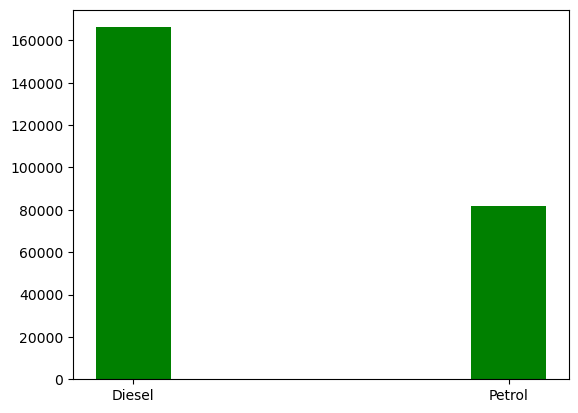

In [21]:
plt.bar(df['f_type'],df['km'],width=0.2,color='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x2228ee66fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2228ee67250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2228ee66e90>],
 'medians': [<matplotlib.lines.Line2D at 0x2228ee674d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2228ee67610>],
 'means': []}

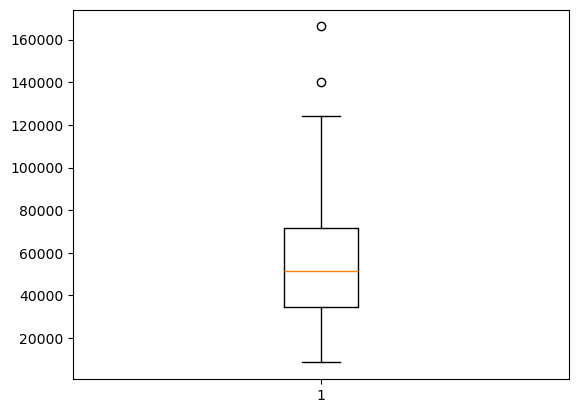

In [22]:
plt.boxplot(df['km'])

In [24]:
import numpy as np
mean = np.mean(df['km'])
std_dev = np.std(df['km'])

z_score = (df['km'] - mean)/std_dev
outliers = df['km'][np.abs(z_score) >2]
outliers

6911    140000
1834    166194
Name: km, dtype: int64

In [25]:
df.groupby('Location')['Price'].mean()

Location
Bangalore     17.142857
Coimbatore    14.670000
Hyderabad     10.865714
Kochi          7.432245
Kolkata       10.297500
Mumbai         4.612857
Pune           7.297619
Name: Price, dtype: float64

In [26]:
df.groupby('Location')['Price'].mean().sort_values()

Location
Mumbai         4.612857
Pune           7.297619
Kochi          7.432245
Kolkata       10.297500
Hyderabad     10.865714
Coimbatore    14.670000
Bangalore     17.142857
Name: Price, dtype: float64

In [27]:
df.groupby('Location')['Price'].mean().sort_values(ascending=False)

Location
Bangalore     17.142857
Coimbatore    14.670000
Hyderabad     10.865714
Kolkata       10.297500
Kochi          7.432245
Pune           7.297619
Mumbai         4.612857
Name: Price, dtype: float64

<Axes: xlabel='Location'>

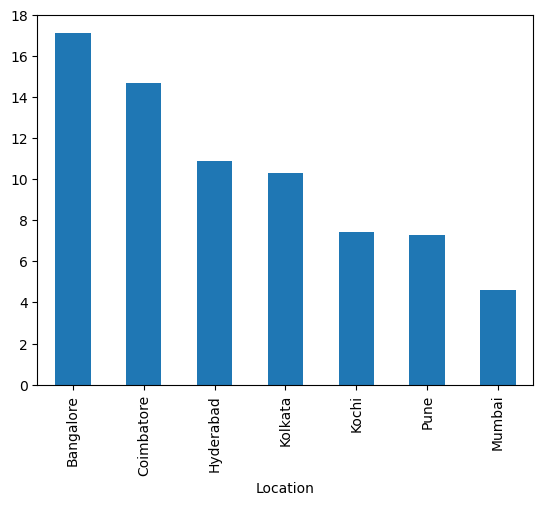

In [28]:
df.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar()

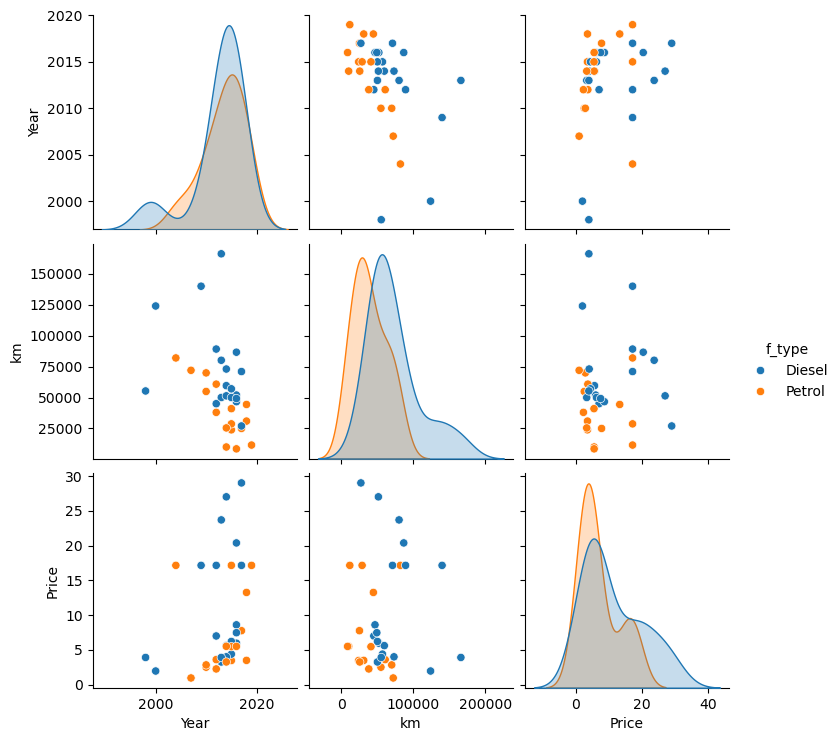

In [30]:
import seaborn as sns
# sns.pairplot(data=df)
sns.pairplot(data=df,hue='f_type')

In [ ]:
##########################